In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Samartha\\Placements\\Projects\\Uber Data analysis\\Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.isnull().any() 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [8]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [9]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Categories We Have

In [11]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

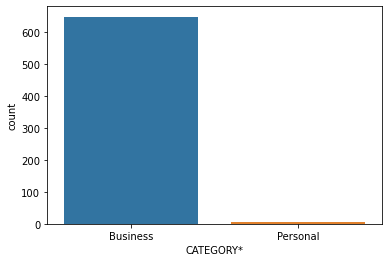

In [12]:
sns.countplot(x='CATEGORY*',data=data)

*We* have large number of business rides caegory as against very few personal rides.

How long do people travel with Uber?

<AxesSubplot:ylabel='Frequency'>

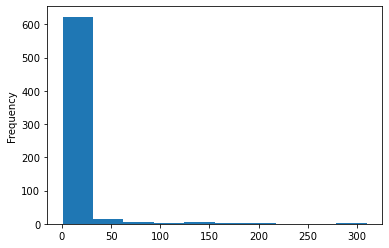

In [13]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber.

What Hour Do Most People Take Uber To Their Destination?

Text(0.5, 1.0, 'Number of trips Vs hours')

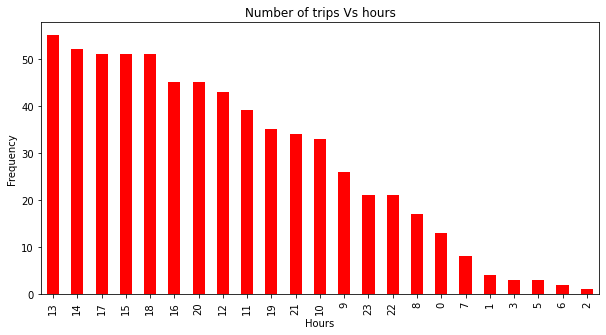

In [15]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

Check The Purpose Of Trips

<AxesSubplot:>

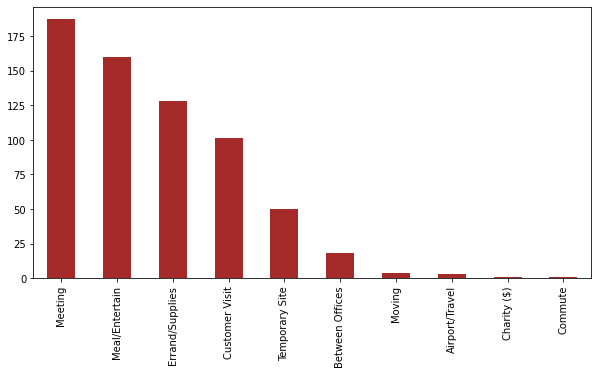

In [16]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

Which Day Has The Highest Number Of Trips

<AxesSubplot:>

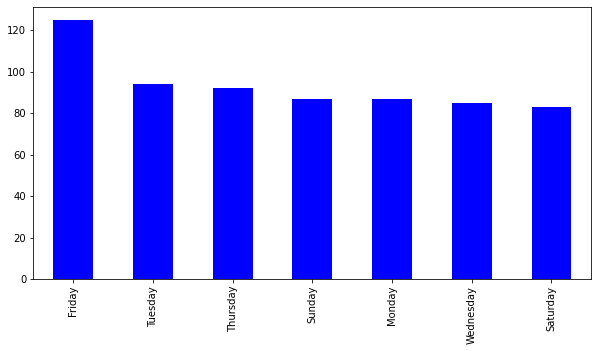

In [17]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

So Friday has the highest number of Trips.

What Are The Number Of Trips Per Each Day?

<AxesSubplot:>

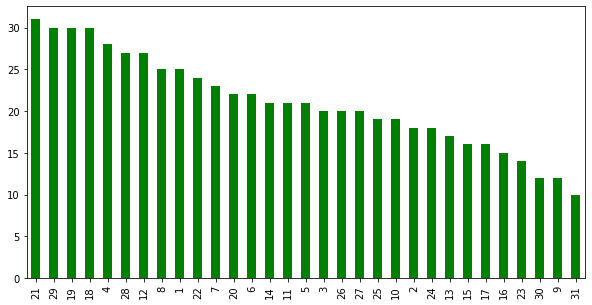

In [19]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

What Are The Trips In The Month

<AxesSubplot:>

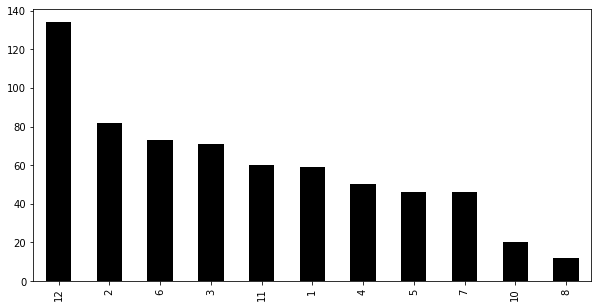

In [20]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We can see that December(12) has the most trips

The starting points of trips. Where Do People Start Boarding Their Trip From Most?

<AxesSubplot:>

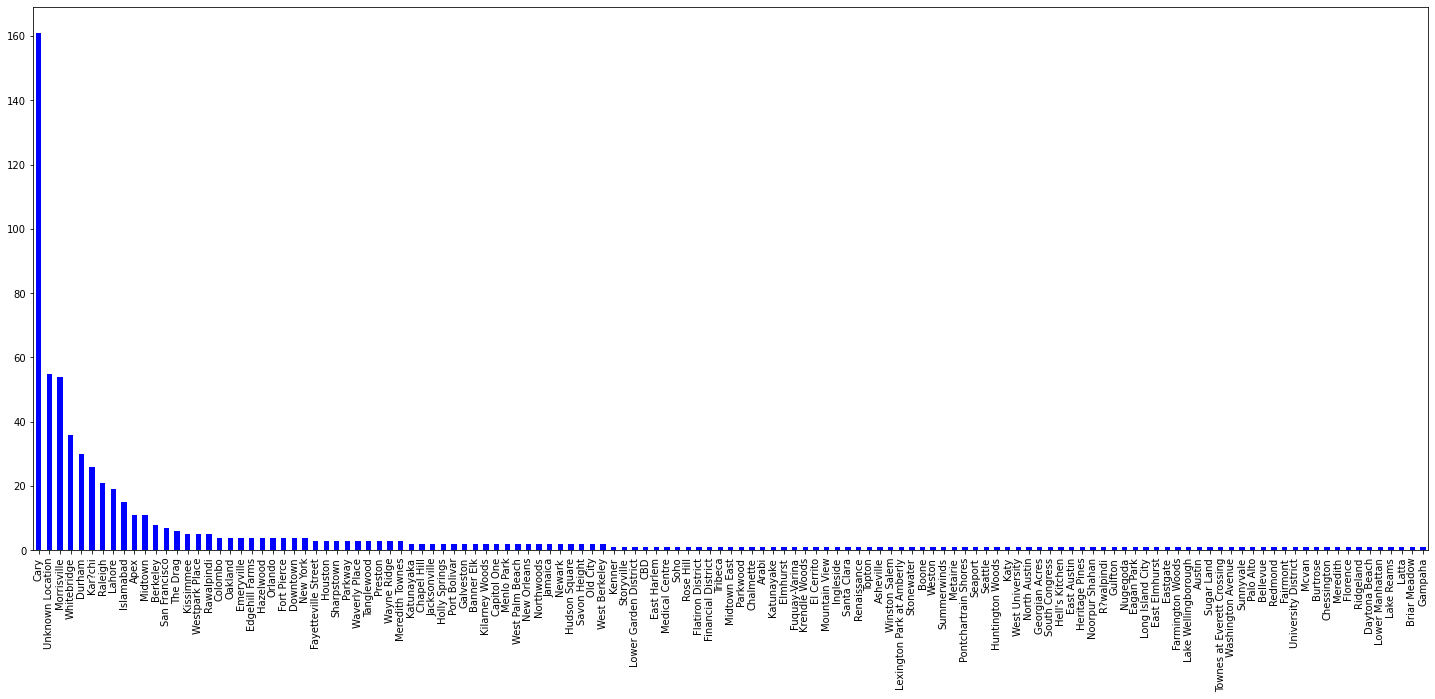

In [21]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Most people in this dataset starts their journey from Cary followed by some unknown location and then Morrisville.